In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Retail_Transactions_Dataset.csv", parse_dates=True)

In [72]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,NaN
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,NaN
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          20009 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 2.8+ MB


In [74]:
# Replacing the NaN with no promotion, because these are customers that were not giving discount
df['Promotion'] = df['Promotion'].replace(np.nan, 'No Promotion')

In [75]:
# Separated each products without them being in a list
import re
df['Product'] = df['Product'].apply(lambda x: ', '.join(eval(x)) if isinstance(x, str) else '')


In [76]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,Hair Gel,6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,No Promotion
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"Tuna, Bread, Tissues, Trash Bags",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"Jam, Soap, Ketchup",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,No Promotion
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,BBQ Sauce,9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"Hand Sanitizer, Bread, Extension Cords, Ice Cr...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,No Promotion


## Who are the top customers in terms of total spending?

In [125]:
top_customers= df.groupby('Customer_Category')['Total_Cost'].sum().reset_index().sort_values(by='Total_Cost', ascending=False)

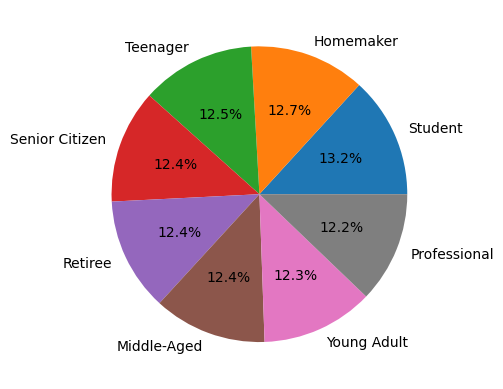

In [133]:
plt.pie(top_customers['Total_Cost'],labels =top_customers['Customer_Category'],autopct='%1.1f%%')

plt.xticks(rotation=90)
plt.show()

This retail outlet has more of students as customer

## What is the distribution of sales across different stores and cities?


In [110]:
city_sales = df.groupby(['City','Store_Type'])['Total_Cost'].sum().reset_index()

<Figure size 1600x1400 with 0 Axes>

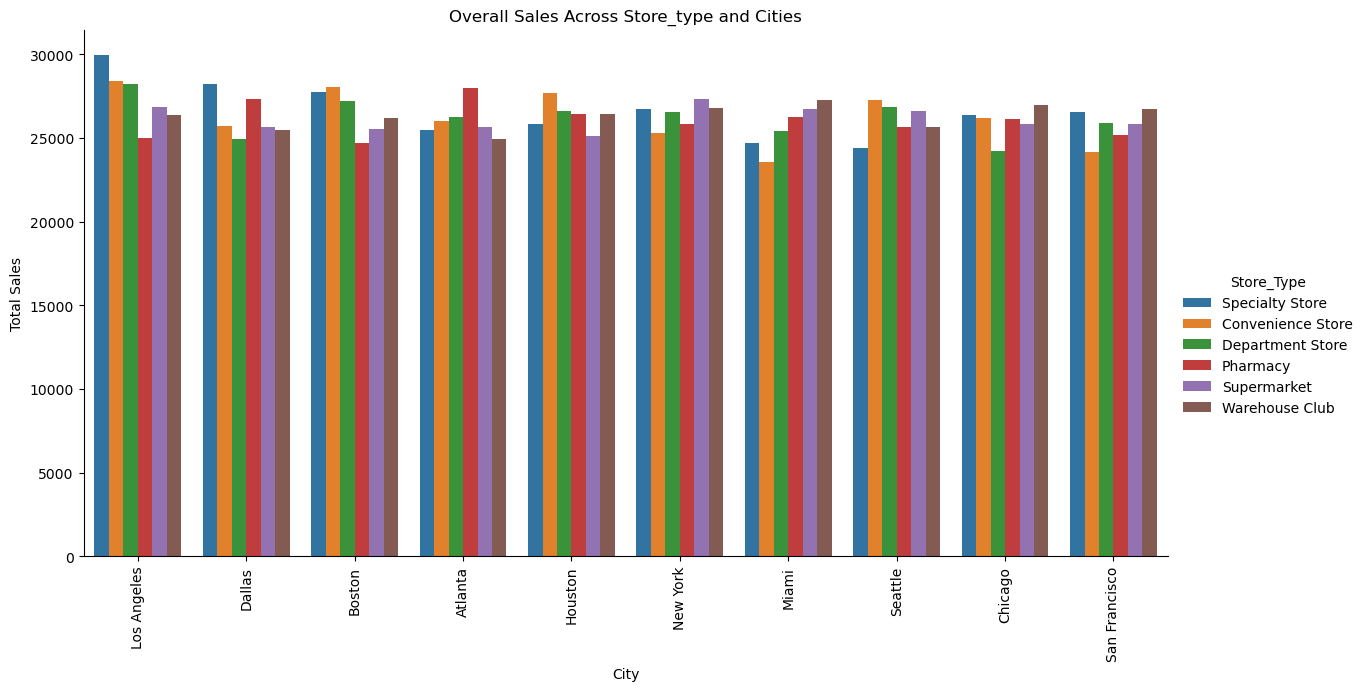

In [140]:
city_sales_sorted = city_sales.sort_values(by='Total_Cost', ascending=False)

plt.figure(figsize=(16,14))

sns.catplot(x='City',y='Total_Cost', data = city_sales_sorted, kind='bar', hue= 'Store_Type',height=6, aspect=2)
plt.xticks(rotation = 90)
plt.title("Overall Sales Across Store_type and Cities")
plt.ylabel("Total Sales")
plt.xlabel("City") 
plt.show()

## Which products are the best-sellers?


In [197]:
Best_Product = df.groupby('Product')['Total_Cost'].sum().sort_values(ascending=False).reset_index()

In [198]:
Best_Product.head()

,Product,Total_Cost
0,Toothpaste,6898.52
1,Milk,5139.51
2,Yogurt,4918.57
3,Tuna,4913.11
4,Peanut Butter,4624.01


## Which products have the highest and lowest sales?


In [206]:
highest_selling_product= Best_Product['Product'].iloc[0].upper()
print(f'THE PRODUCT WITH THE HIGHEST SALES IS {highest_selling_product}')
                                             


THE PRODUCT WITH THE HIGHEST SALES IS TOOTHPASTE


In [208]:
min_cost_product_name = Best_Product.loc[Best_Product['Total_Cost'].idxmin(), 'Product'].upper()

print(f'THE PRODUCT WITH THE LOWEST SALES IS {min_cost_product_name}')



THE PRODUCT WITH THE LOWEST SALES IS OLIVE OIL, COFFEE, DIAPERS


## What is the average transaction size?


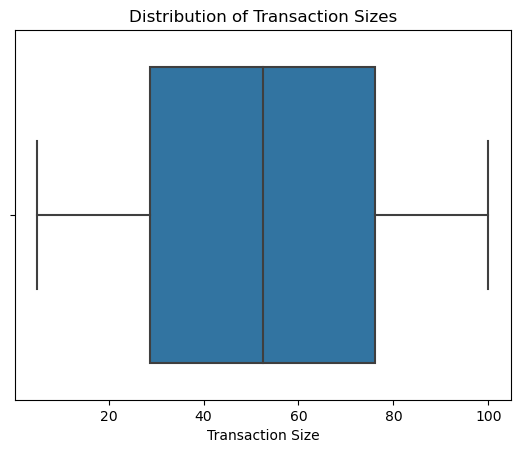

Average Transaction Size: $52.50


In [159]:
average_transaction_size = df['Total_Cost'].mean()

# Create a box plot to visualize the distribution of transaction sizes
sns.boxplot(x=df['Total_Cost'])
plt.title('Distribution of Transaction Sizes')
plt.xlabel('Transaction Size')
plt.show()

print(f'Average Transaction Size: ${average_transaction_size:.2f}')


In [209]:
df['Promotion'].value_counts()

Promotion
BOGO (Buy One Get One)        10068
No Promotion                   9991
Discount on Selected Items     9941
Name: count, dtype: int64

## Are there seasonal trends in product sales?


In [218]:
Best = df.groupby(['Product', 'Season'])['Total_Cost'].sum().sort_values(ascending=False).reset_index()

In [219]:
Best

,Product,Season,Total_Cost
0,Toothpaste,Winter,2080.33
1,Milk,Fall,1911.88
2,Ketchup,Spring,1861.82
3,Toothpaste,Fall,1793.08
4,Yogurt,Spring,1642.56
...,...,...,...
23696,"Pickles, Toothpaste, Diapers, Hand Sanitizer, ...",Winter,5.03
23697,"Mustard, Trash Cans, Plant Fertilizer",Fall,5.02
23698,"Iron, BBQ Sauce, Shrimp, Feminine Hygiene Prod...",Fall,5.01
23699,"Soda, Iron",Winter,5.01
